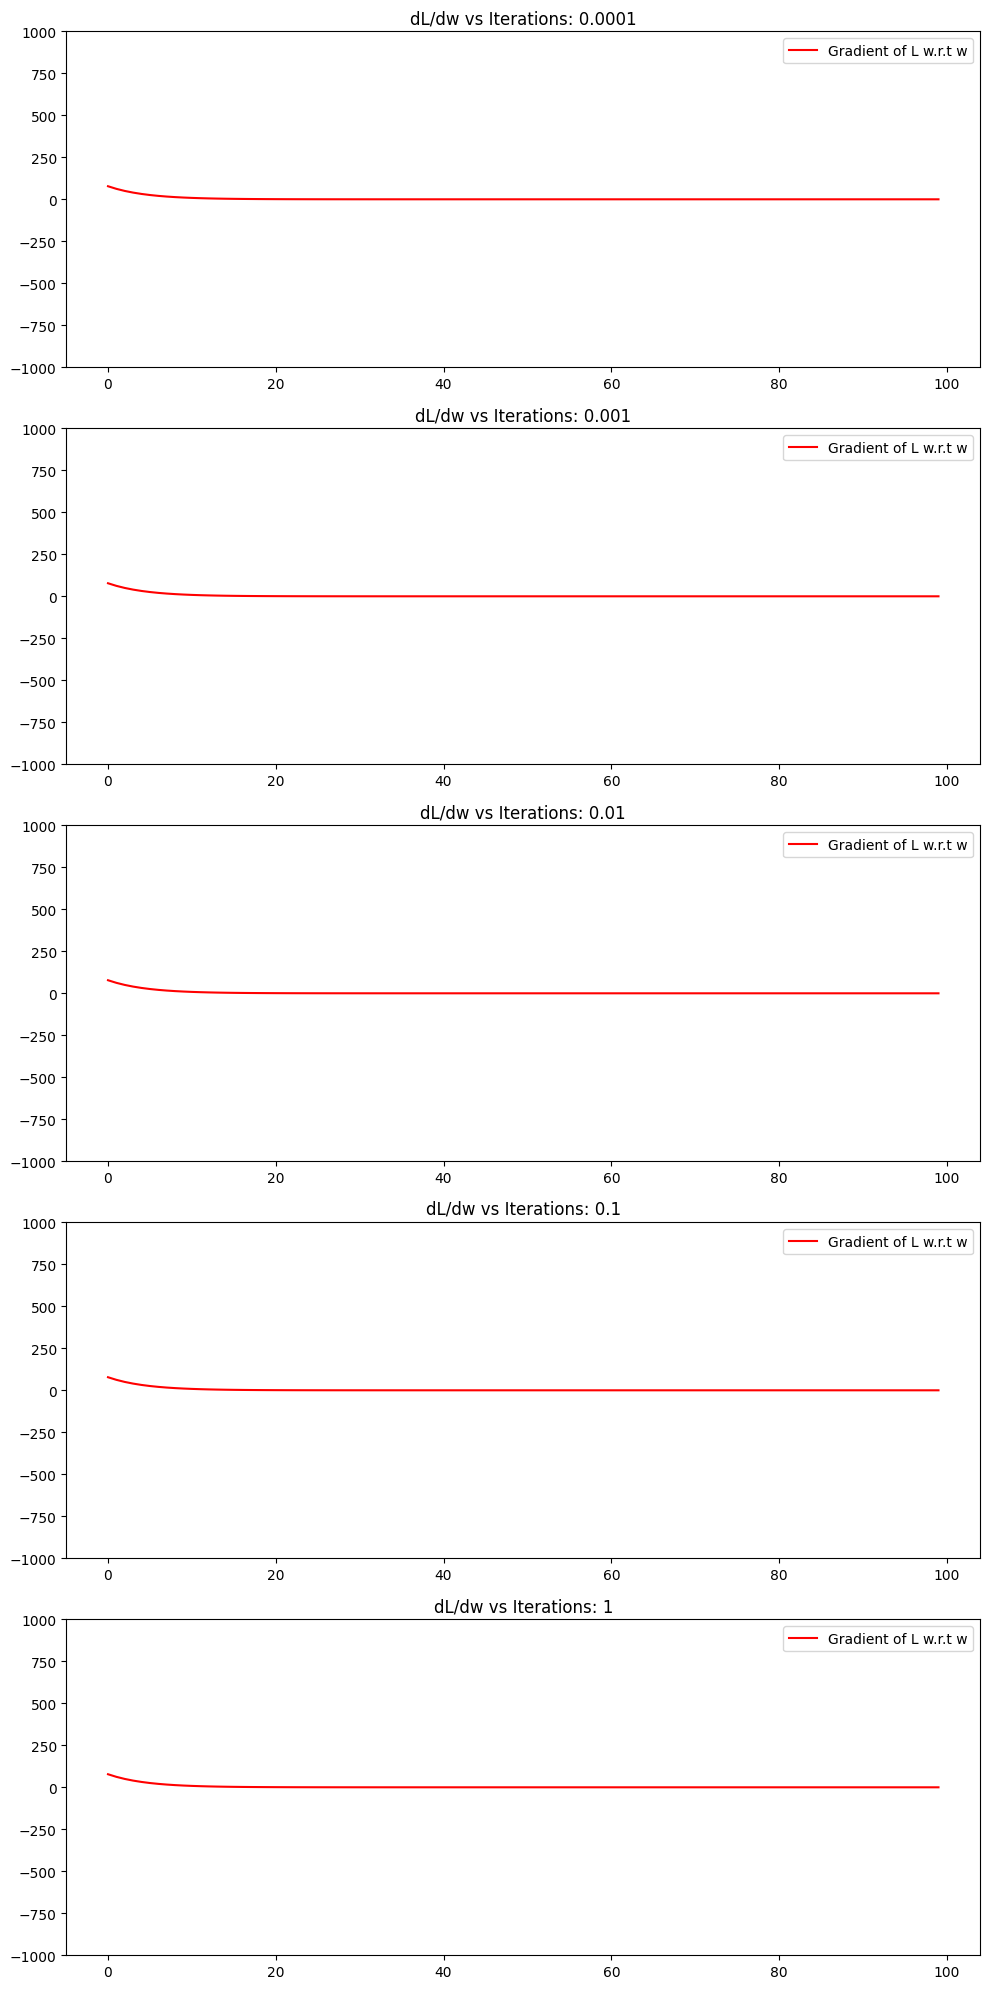

In [18]:
import numpy as np
import matplotlib.pyplot as plt



class GenerateData:

    """

        This class is a data generator class. Main purpose is to generate data for the linear regression model.

        Input: 
            num_points: Number of data points to generate
            w_true: True weight value
            b_true: True bias value
            x_bound: Bound for x values
            noise_std: Standard deviation of noise to add to the data

        Output:
            X: Input data
            Y: Output data

        Functions :

            generateStandardData: Generates data with standardized X values
            generateNonStandardData: Generates data with non-standardized X values  (for visualization and research purposes)

    
    
    """

    def __init__(self, num_points=100, w_true=52.94, b_true=-39, x_bound=10, noise_std=10):
        self.num_points = num_points
        self.w_true = w_true
        self.b_true = b_true
        self.x_bound = x_bound
        self.noise_std = noise_std

    def generateStandardData(self):


        """

        Whoever takes time to read this, data generation and standardization is supposed to be done while pre-processing the data, which is why I have kept this completely
        separated from the GradientDescentAnalyzer class. This is done to keep the code clean and modular, and to make sure that the data is
        generated in a separate class, and then passed to the GradientDescentAnalyzer class for actual implementation. 

        Note that the generated data in itself is standardized, meaning that the X values which are generated initially arent standard,
        but are standardized before being returned, using the formula (X - mean(X)) / (std(X) + 1e-8). This is done to prevent any divide by zero
        errors, and to make sure that the data is standardized properly. 

        What is done usually is that there is some real data, it is standardized before it is being passed to the model, and then the model 
        trains on the training data. In this project, the data is artificially generated, and then standardized, which is not the usual practice,
        but is done here to show the effects of standardization on the loss function and the gradients.

        Most Importantly, DO NOT STANDARDIZE YOUR DATA BEFORE SPLITTING! This is a very common mistake, and is a very bad practice. Always split
        your data into training and testing sets, and then standardize the data. This is done to prevent any data leakage from the testing set to the
        training set. What ends up happening is that the mean and standard deviation of the entire dataset is used to standardize the data, which
        means that the mean and standard deviation of the testing set is used to standardize the training set till some extent, which is a very bad practice, 
        and leads to data leakage, which can lead to overfitting, and the model not generalizing well on unseen data.
        

        
        """


        X = np.linspace(-self.x_bound, self.x_bound, self.num_points)
        noise = np.random.normal(0, self.noise_std, self.num_points)
        
        # Standardization with safe division to prevent any divide by zero errors


        X_std = (X - np.mean(X)) / (np.std(X) + 1e-8)
        noise_std = (noise - np.mean(noise)) / (np.std(noise) + 1e-8)
        
        Y = self.w_true * X_std + self.b_true + noise_std
        return X_std, Y

    def generateNonStandardData(self):
        X = np.linspace(-self.x_bound, self.x_bound, self.num_points)
        noise = np.random.normal(0, self.noise_std, self.num_points)
        
        Y = self.w_true * X + self.b_true + noise
        return X, Y



class GradientDescentAnalyzer:


    """

        This class is a gradient descent analyzer class.

        Constructor Inputs: Learning rate, Maximum iterations

        A constructor here does not have a lot of use, its mainly just used to create the object of this class.
        The actual data is directly passed to the functions of this class.

        Functions :
        
            1) compute_gradients: Computes the gradients of the loss function w.r.t w and b

                Description : compute_gradients uses the formula in the markdown above to compute the gradient of loss with respect to the weight.
                In this particular case, we only consider gradient of the loss with respect to the weight, as this gradient is much more impacted 
                by the standardization of the data. However, the gradient of the loss with respect to the bias is also computed, but not used in this
                case.

                Input :
                
                    1) X: Input data -> List
                    2) Y: Output data -> List
                    3) w: Weight value -> Float
                    4) b: Bias value -> Float
                    5) standardize_loss: Boolean value as an option to standardize or non-standardize the loss function, default is standardize -> Boolean

                Output :

                    1) dL_dw: Gradient of the loss function w.r.t w -> Float
                    2) dL_db: Gradient of the loss function w.r.t b -> Float


            2) fit: Fits the model to the data and returns the final weights and biases
                
                Description : fit uses the compute_gradients function to compute the gradients of the loss function w.r.t w and b, and then updates 
                the weights and biases using the learning rate and the gradients. The function runs for the maximum number of iterations specified
                in the constructor. The function also stores the history of weights and gradients for visualization and analysis purposes.


                Input :
                
                    1) X: Input data -> List
                    2) Y: Output data -> List

                Output :
                    
                    1) w: Final weight value -> Float
                    2) b: Final bias value -> Float
                    3) w_history: History of weight values -> List
                    4) gradient_history: History of gradients of the loss function w.r.t w -> List

        Output :
        
            w: Final weight value
            b: Final bias value
            w_history: History of weight values
            gradient_history: History of gradients of the loss function w.r.t w




    """


    def __init__(self, learning_rate=0.01, max_iterations=100):

        """

        Monumental fumble on this part, I shouldve just taken everything as parameters in this constructor, including all the inputs, etc. 
        Wouldve saved a ton of time and effort, and i wouldnt even need to take parameters in the functions, as the data would be directly
        passed to the functions from this constructor.
        

        """


        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        

    
    def compute_gradients(self, X, Y, w, b, standardize_loss=True):
        N = len(X)
        predictions = w * X + b
        errors = predictions - Y
        
        dL_dw = np.sum(X * errors)
        dL_db = np.sum(errors)


        """

        This following problem only occurs when the loss function is not standardized, which is in itself a bad practice.

        If the if-condition is not satisfied, thats when gradients arent standardized, and thats what leads to exploding gradients,
        as the gradient values explode, the weights and biases are updated with very large values, which leads to the model not converging.

        Usually the loss function is always standardized, and there isnt an option to keep it non-standardized, but I have added this option
        to clearly see the effects of exploding gradients.

        """
        


        if standardize_loss:                
            dL_dw = 2 * dL_dw / N
            dL_db = 2 * dL_db / N
            
        return dL_dw, dL_db
    
    def fit(self, X, Y):
        w, b = 0, 0
        w_history = [w]
        gradient_history = []

        """

        Initial weight and bias is set to 0 in this case, but can be set to any value, as the model will eventually converge to the true.
        Initial conditions can be tweaked to test the performance of a model, and to see how the model converges to the true values.

        If the model does not perform well with some initial condition, the gradient of loss wrt weight should be checked to see if the gradients are exploding.
        If the gradients are exploding, the loss function and the data should be standardized, and the model should be re-run.
        However, if the gradients are not exploding, the learning rate should be increased, and the model should be re-run.
        One can usually tell if the learning rate is the problem, if the model converges to the true values but does not fit the line properly, rather 
        it usually deviates by some angle. This is usually a sign of a low learning rate, and the learning rate should be increased.



        """
        
        for i in range(self.max_iterations):
            dL_dw, dL_db = self.compute_gradients(X, Y, w, b, standardize_loss=True)    #If thandardize loss is kept false, the gradients explode.
            gradient_history.append(dL_dw)  #Super helpful to track the gradients.
            
            w -= self.learning_rate * dL_dw     #This is where weight updation takes place
            b -= self.learning_rate * dL_db
            w_history.append(w)
            
        return w, b, w_history, gradient_history
    


class Plot:
    def __init__(self, data_generator, gradient_analyzer, stds=[0.0001,0.001,0.01,0.1,1]):   #stds just stand for the range of x values, to test data on multiple ranges helps determining the effect of convergence.
                                                                                        #when the range of X value is high, the MSE value is high, which leads to gradients having higher magnitude, and the model does not converge properly.
        

        """
        This class is a plot class. The main purpose of this class is to plot the gradient of loss wrt weight against the number of iterations.
        This is done for multiple standard deviations of the data, to see the effect of non-standardization of the data on the convergence of 
        the model, which is very evident, as the model does not converge properly when the data is not standardized. However, when the model is standardized,
        the standard deviation's role is minimized, since the variance of the standardized data is 1, and the mean is 0, which makes the data more uniform, and the model
        converges properly.

        Class Properties : 

        Constructor:

            Inputs : 

                data_generator: Data generator object : GenerateData : Object
                gradient_analyzer: Gradient Descent Analyzer object : GradientDescentAnalyzer : Object
                stds: List of standard deviations of the data : List

                Reasoning behind such a constructor and its parameters: 

                What do we require for plotting the convergence of the model? We require the data, and the model, which is what we assume we have.
                Although the coding was done in a separate notebook using just normal functions, this has been entirely restructured to use classes,
                for better understanding and readability, moreover it keeps the code clean and modular.
                
                The main reason why such a format is followed is to define the objective of this class, and restrict its scope.
                Clearly, the parameters are themselves objects, which restricts this class to only be using those objects for the operations.
                One way to go about this is, assuming that we already have the data, and the model, we can directly pass the data and the model to the class,
                and then plot the convergence of the model. This is done to keep the code clean and modular, and to make sure that the data is generated in a separate class,
                and then passed to the GradientDescentAnalyzer class for actual implementation.

                The main purpose of this class is to plot the convergence of the model, and to see the effect of standardization on the convergence of the model.
                This class is solely responsible for plotting the convergence of the model, and nothing else. The data is generated in the data generator class,
                and the model is fit in the gradient analyzer class.

            Functions :

                plot_convergence: Plots the convergence of the model for multiple standard deviations of the data. Uses subplots.
                
                Description : 
                    This is where I recover from the previous fumble, all the required data is passed to the constructor of this class,
                    so there is no real need to pass all that data to the functions of this class. The data is directly passed to the functions
                    of this class from the constructor. This is done to keep the code clean and modular.

            Output :
                fig: Figure object : Matplotlib Figure Object

                


        
        """
        
        
        self.data_generator = data_generator
        self.gradient_analyzer = gradient_analyzer
        self.stds = stds
    
    def plot_convergence(self):

        fig, axes = plt.subplots(len(self.stds), 1, figsize=(10, 4*len(self.stds))) # Im generous with the spacing :)
        
        for i, std in enumerate(self.stds):

            # Update data generator parameters for this iteration
            self.data_generator.x_bound = std
            X, Y = self.data_generator.generateStandardData()
            
            # Use the existing analyzer instance
            _, _, _, gradients = self.gradient_analyzer.fit(X, Y)   #This essentially calls the INSTANCE of the GradientDescentAnalyzer class, and fits the model to the data.

            # The underscores are used to ignore the values of w, b, and w_history, as they are not used in this case.

            
            axes[i].plot(gradients, color='red', label='Gradient of L w.r.t w')
            axes[i].set_title(f"dL/dw vs Iterations: {std}")
            axes[i].set_ylim(-1000, 1000) #Had to restrict to this, otherwise its really difficult to visualise the graphs.
            axes[i].legend()   
        
        plt.tight_layout() # This is used to make sure that the subplots dont overlap, and are properly spaced out.
        return fig

# Example usage

# Create instances
data_generator = GenerateData(num_points=100, w_true=-39, b_true=30, noise_std=109)
gradient_analyzer = GradientDescentAnalyzer(learning_rate=0.1)
plot = Plot(data_generator, gradient_analyzer)

# Generate and display plot
fig = plot.plot_convergence()
plt.show()